# Advanced Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from PIL import Image
from tqdm import tqdm
import os

In [3]:
def plot_acc(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title("Accuracy vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [4]:
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title("Loss vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [5]:
mfcc_df = pd.read_csv("../Datasets/Extracted_Features.csv")
mfcc_df.head()

,features,class
0,"[-113.59882, 121.57067, -19.162262, 42.363937,...",blues
1,"[-207.52383, 123.98514, 8.94702, 35.86715, 2.9...",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686691,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855278, 1....",blues
4,"[-160.35417, 126.209496, -35.581394, 22.139256...",blues


In [6]:
mfcc_df['features'] = mfcc_df['features'].apply(lambda x: np.array(x[1:-1].split(', '), dtype='float64'))

In [7]:
gfcc_df = pd.read_csv("../Datasets/Extracted_Features_GFCC.csv")
gfcc_df.head()

,features,class
0,"[1.4855074228359737, 0.520658226391927, -0.137...",blues
1,"[1.0738038098892013, 0.5237781394770105, 0.110...",blues
2,"[1.8221175240420988, 0.6152603289981299, -0.32...",blues
3,"[1.259443149350743, 0.7799979711432755, 0.2812...",blues
4,"[1.113140421048558, 0.13917166183663796, -0.41...",blues


In [8]:
gfcc_df['features'] = gfcc_df['features'].apply(lambda x: np.array(x[1:-1].split(', '), dtype='float64'))

In [9]:
croma_df = pd.read_csv("../Datasets/Extracted_Features_Chroma.csv")
croma_df.head()

,features,class
0,"[0.36224282, 0.36781698, 0.43983436, 0.2446917...",blues
1,"[0.4600403, 0.35018247, 0.3208068, 0.21147157,...",blues
2,"[0.27290025, 0.19595261, 0.31516546, 0.4079862...",blues
3,"[0.34137166, 0.40862367, 0.52431905, 0.5470129...",blues
4,"[0.1926048, 0.3172665, 0.39202204, 0.25582698,...",blues


In [10]:
croma_df['features'] = croma_df['features'].apply(lambda x: np.array(x[1:-1].split(', '), dtype='float64'))

In [11]:
np.array(croma_df['features'].tolist())

array([[0.36224282, 0.36781698, 0.43983436, ..., 0.3150803 , 0.40700835,
        0.3851007 ],
       [0.4600403 , 0.35018247, 0.3208068 , ..., 0.2553258 , 0.2847761 ,
        0.3340937 ],
       [0.27290025, 0.19595261, 0.31516546, ..., 0.4018187 , 0.3843895 ,
        0.5885082 ],
       ...,
       [0.38450044, 0.37608016, 0.5337095 , ..., 0.5270724 , 0.38660467,
        0.46887425],
       [0.4699445 , 0.3563885 , 0.2970142 , ..., 0.3368921 , 0.26376984,
        0.3410944 ],
       [0.36187446, 0.26438475, 0.21106467, ..., 0.23765796, 0.28131416,
        0.5416488 ]])

In [12]:
zcr_df = pd.read_csv("../Datasets/Extracted_Features_ZCR.csv")
zcr_df.head()

,features,class
0,"[0.06494140625, 0.0830078125, 0.10791015625, 0...",blues
1,"[0.015625, 0.01806640625, 0.021484375, 0.01953...",blues
2,"[0.04638671875, 0.06396484375, 0.0859375, 0.08...",blues
3,"[0.01025390625, 0.0146484375, 0.0185546875, 0....",blues
4,"[0.03955078125, 0.06494140625, 0.08935546875, ...",blues


In [13]:
zcr_df['features'] = zcr_df['features'].apply(lambda x: np.array(x[1:-1].split(', '), dtype='float64'))

In [14]:
zcr_df['length'] = zcr_df['features'].apply(lambda x: len(x))

In [15]:
zcr_df[zcr_df['length'] != 1293]

,features,class,length
142,"[0.05078125, 0.06982421875, 0.09423828125, 0.0...",classical,1308
145,"[0.0458984375, 0.0673828125, 0.0869140625, 0.0...",classical,1300
148,"[0.06689453125, 0.09521484375, 0.1240234375, 0...",classical,1296
149,"[0.052734375, 0.078125, 0.10009765625, 0.09277...",classical,1292
151,"[0.0263671875, 0.03369140625, 0.04248046875, 0...",classical,1292
153,"[0.05615234375, 0.0908203125, 0.1162109375, 0....",classical,1309
154,"[0.06005859375, 0.07958984375, 0.0986328125, 0...",classical,1314
156,"[0.04052734375, 0.056640625, 0.07470703125, 0....",classical,1296
200,"[0.02490234375, 0.041015625, 0.06201171875, 0....",country,1296
202,"[0.05712890625, 0.08203125, 0.103515625, 0.097...",country,1308


In [16]:
tempo_df = pd.read_csv("../Datasets/Extracted_Features_tempo.csv")
tempo_df.head()

,tempo,class
0,123.046875,blues
1,107.666016,blues
2,161.499023,blues
3,172.265625,blues
4,135.999178,blues


#### Preparing the datasets

In [22]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [18]:
X1 = np.array(mfcc_df['features'].tolist())
X2 = np.array(gfcc_df['features'].tolist())
X3 = np.array(croma_df['features'].tolist())
X4 = np.array(tempo_df['tempo'].tolist())

y = np.array(gfcc_df['class'].tolist())

In [19]:
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))

In [20]:
X1.shape, X2.shape, X3.shape, X4.shape, y.shape

((999, 40), (999, 13), (999, 12), (999,), (999, 10))

In [21]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=101)
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.2, random_state=101)
X3_train, X3_test, _, _ = train_test_split(X3, y, test_size=0.2, random_state=101)
X4_train, X4_test, _, _ = train_test_split(X4, y, test_size=0.2, random_state=101)

In [22]:
X1_train.shape, X2_train.shape, X3_train.shape, X4_train.shape, y_train.shape

((799, 40), (799, 13), (799, 12), (799,), (799, 10))

### Model Architecture

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Concatenate, concatenate

In [149]:
inputA = Input(shape=(40,))
inputB = Input(shape=(13,))
inputC = Input(shape=(12,))
inputD = Input(shape=(1,))

x = Dense(128, activation="relu")(inputA)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
x = Model(inputs=inputA, outputs=x)

y = Dense(128, activation="relu")(inputB)
y = BatchNormalization()(y)
y = Dropout(0.5)(y)
y = Dense(256, activation="relu")(y)
y = BatchNormalization()(y)
y = Dropout(0.5)(y)
y = Dense(256, activation="relu")(y)
y = BatchNormalization()(y)
y = Dropout(0.4)(y)
y = Model(inputs=inputB, outputs=y)

z = Dense(128, activation="relu")(inputC)
z = BatchNormalization()(z)
z = Dropout(0.5)(z)
z = Dense(256, activation="relu")(z)
z = BatchNormalization()(z)
z = Dropout(0.5)(z)
z = Dense(256, activation="relu")(z)
z = BatchNormalization()(z)
z = Dropout(0.4)(z)
z = Model(inputs=inputC, outputs=z)

l = Dense(64, activation="relu")(inputD)
l = BatchNormalization()(l)
l = Dropout(0.5)(l)
l = Dense(128, activation="relu")(l)
l = BatchNormalization()(l)
l = Dropout(0.4)(l)
l = Model(inputs=inputD, outputs=l)

# combine the output of the two branches
combined = concatenate([x.output, y.output, z.output, l.output])

# combined outputs
m = Dense(128, activation="relu", kernel_initializer='ones',
          kernel_regularizer=tf.keras.regularizers.L1(0.01),
          activity_regularizer=tf.keras.regularizers.L2(0.01))(combined)
m = Dropout(0.5)(m)
m = BatchNormalization()(m)
m = Dense(64, activation="relu")(combined)
m = Dropout(0.3)(m)
m = BatchNormalization()(m)
m = Dense(10, activation="softmax")(m)

model = Model(inputs=[x.input, y.input, z.input, l.input], outputs=m)
model.summary()

Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 40)]         0           []                               
                                                                                                  
 input_18 (InputLayer)          [(None, 13)]         0           []                               
                                                                                                  
 input_19 (InputLayer)          [(None, 12)]         0           []                               
                                                                                                  
 dense_52 (Dense)               (None, 128)          5248        ['input_17[0][0]']               
                                                                                           

                                                                                                  
 dropout_56 (Dropout)           (None, 256)          0           ['batch_normalization_56[0][0]'] 
                                                                                                  
 dropout_58 (Dropout)           (None, 128)          0           ['batch_normalization_58[0][0]'] 
                                                                                                  
 concatenate_4 (Concatenate)    (None, 896)          0           ['batch_normalization_50[0][0]', 
                                                                  'dropout_53[0][0]',             
                                                                  'dropout_56[0][0]',             
                                                                  'dropout_58[0][0]']             
                                                                                                  
 dense_64 

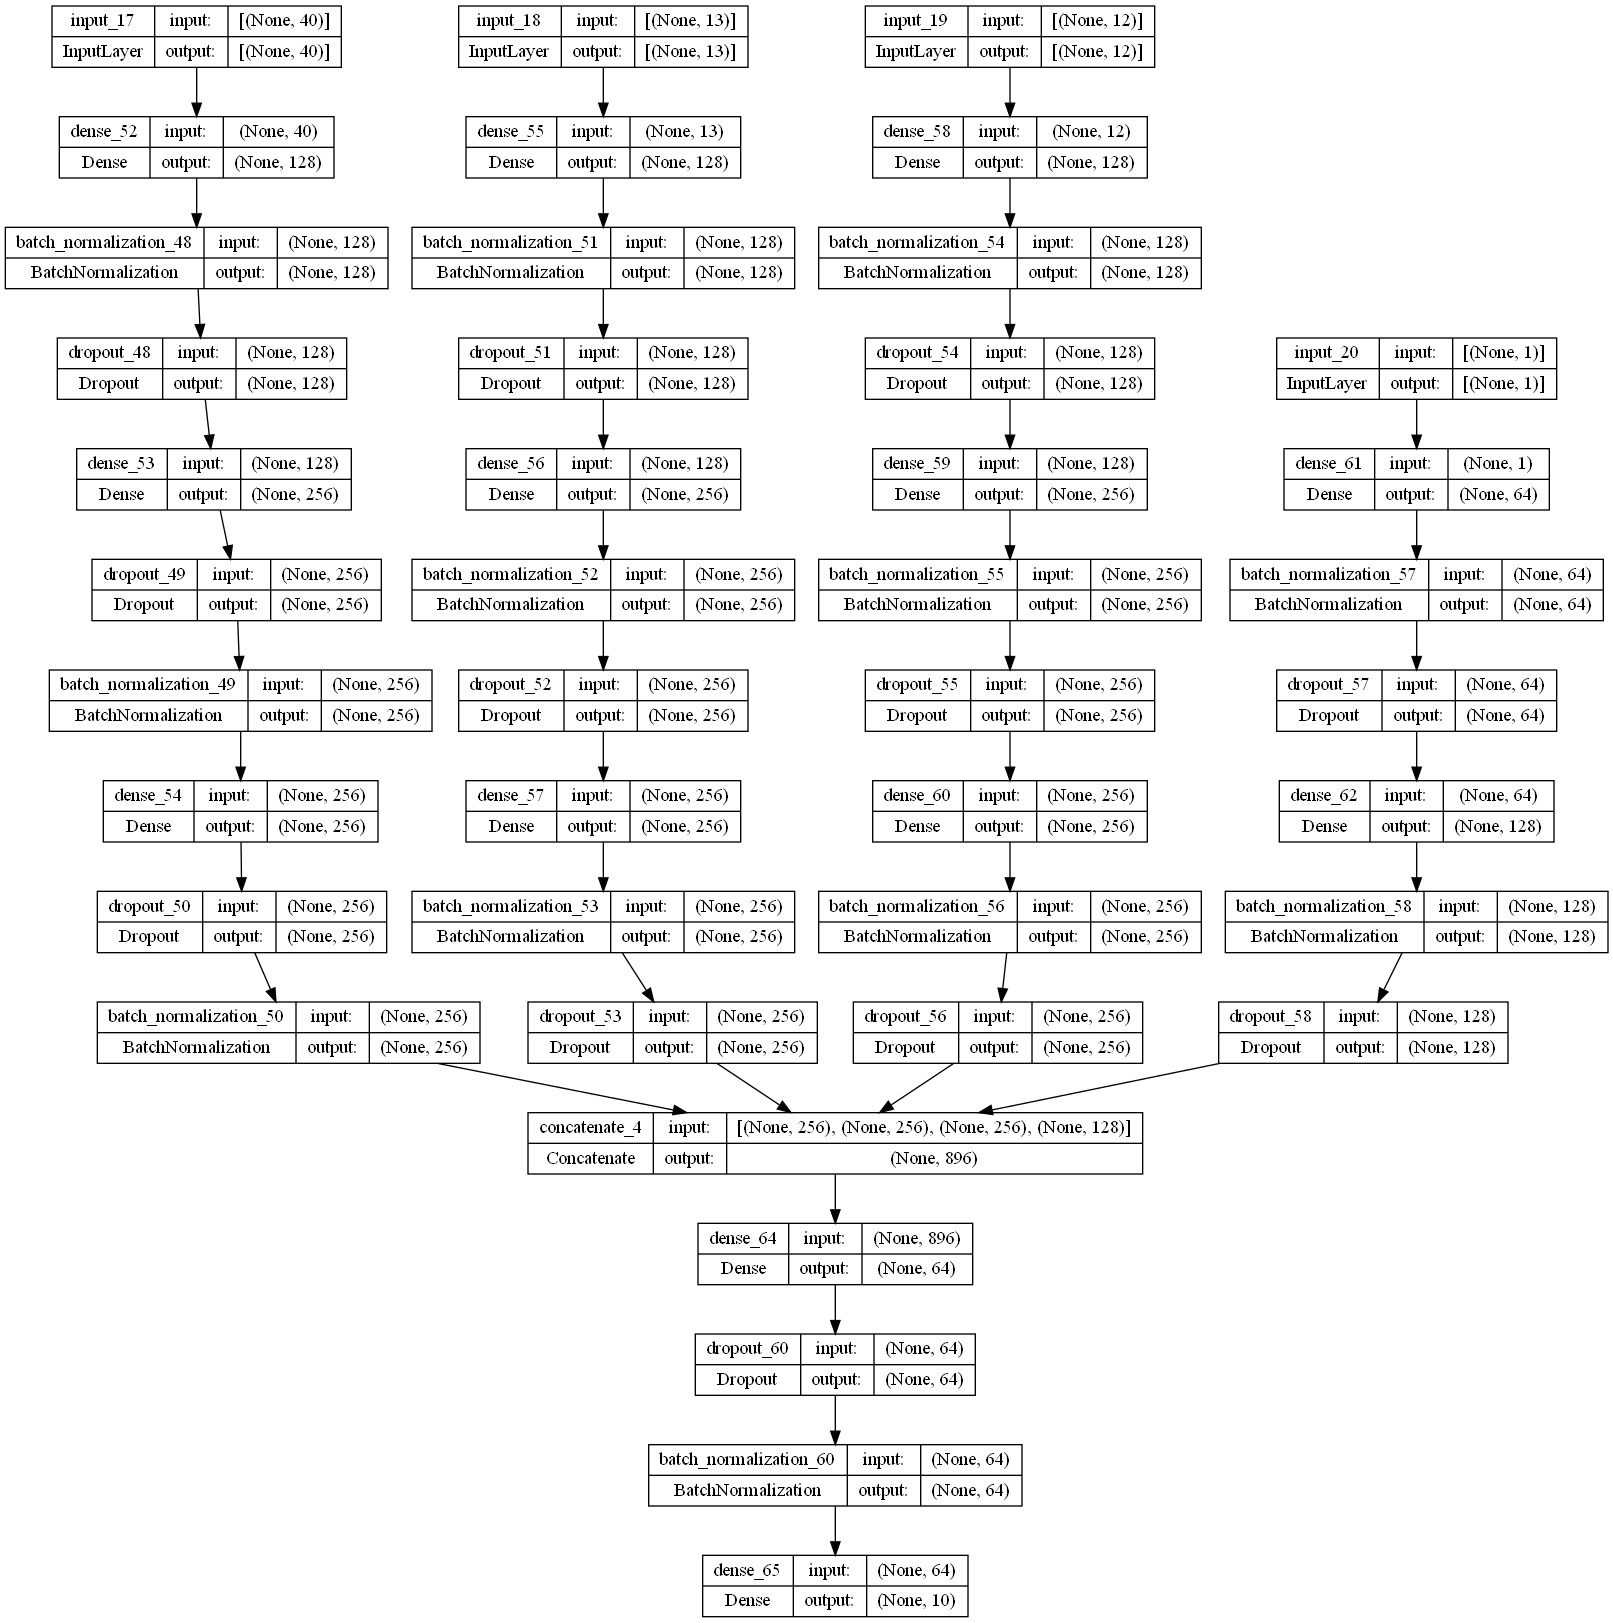

In [150]:
tf.keras.utils.plot_model(model, to_file="combined_4_inputs_ver1.png", show_shapes=True)

In [151]:
opt = Adam(learning_rate=1e-3, decay=1e-3 / 200)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

In [152]:
model.fit(x=[X1_train, 
             X2_train,
             X3_train, 
             X4_train], y=y_train, validation_split=0.2, epochs=200, batch_size=64)

Epoch 1/200
10/10 [==============================] - 3s 57ms/step - loss: 2.7672 - accuracy: 0.1299 - val_loss: 6.3721 - val_accuracy: 0.0750
Epoch 2/200
10/10 [==============================] - 0s 25ms/step - loss: 2.1382 - accuracy: 0.2911 - val_loss: 6.0065 - val_accuracy: 0.0750
Epoch 3/200
10/10 [==============================] - 0s 28ms/step - loss: 1.9194 - accuracy: 0.3490 - val_loss: 5.1434 - val_accuracy: 0.0938
Epoch 4/200
10/10 [==============================] - 0s 26ms/step - loss: 1.7188 - accuracy: 0.4022 - val_loss: 4.5132 - val_accuracy: 0.1000
Epoch 5/200
10/10 [==============================] - 0s 25ms/step - loss: 1.6622 - accuracy: 0.4335 - val_loss: 3.8976 - val_accuracy: 0.1312
Epoch 6/200
10/10 [==============================] - 0s 23ms/step - loss: 1.5570 - accuracy: 0.4789 - val_loss: 3.5727 - val_accuracy: 0.1500
Epoch 7/200
10/10 [==============================] - 0s 25ms/step - loss: 1.4664 - accuracy: 0.4992 - val_loss: 3.3725 - val_accuracy: 0.1375
Epoch 

10/10 [==============================] - 0s 23ms/step - loss: 0.4501 - accuracy: 0.8513 - val_loss: 1.3764 - val_accuracy: 0.6250
Epoch 116/200
10/10 [==============================] - 0s 24ms/step - loss: 0.4366 - accuracy: 0.8294 - val_loss: 1.3230 - val_accuracy: 0.6250
Epoch 117/200
10/10 [==============================] - 0s 22ms/step - loss: 0.4164 - accuracy: 0.8545 - val_loss: 1.3106 - val_accuracy: 0.5938
Epoch 118/200
10/10 [==============================] - 0s 23ms/step - loss: 0.4147 - accuracy: 0.8607 - val_loss: 1.3096 - val_accuracy: 0.6313
Epoch 119/200
10/10 [==============================] - 0s 24ms/step - loss: 0.4051 - accuracy: 0.8701 - val_loss: 1.3373 - val_accuracy: 0.6438
Epoch 120/200
10/10 [==============================] - 0s 22ms/step - loss: 0.4146 - accuracy: 0.8451 - val_loss: 1.3468 - val_accuracy: 0.6313
Epoch 121/200
10/10 [==============================] - 0s 23ms/step - loss: 0.3770 - accuracy: 0.8513 - val_loss: 1.3552 - val_accuracy: 0.6438
Epoch 

Epoch 172/200
10/10 [==============================] - 0s 22ms/step - loss: 0.3107 - accuracy: 0.8998 - val_loss: 1.4174 - val_accuracy: 0.6375
Epoch 173/200
10/10 [==============================] - 0s 22ms/step - loss: 0.3409 - accuracy: 0.8826 - val_loss: 1.3916 - val_accuracy: 0.6375
Epoch 174/200
10/10 [==============================] - 0s 23ms/step - loss: 0.2702 - accuracy: 0.9030 - val_loss: 1.3834 - val_accuracy: 0.6562
Epoch 175/200
10/10 [==============================] - 0s 21ms/step - loss: 0.2974 - accuracy: 0.9030 - val_loss: 1.4328 - val_accuracy: 0.6687
Epoch 176/200
10/10 [==============================] - 0s 24ms/step - loss: 0.3101 - accuracy: 0.8967 - val_loss: 1.4413 - val_accuracy: 0.6500
Epoch 177/200
10/10 [==============================] - 0s 24ms/step - loss: 0.2890 - accuracy: 0.8951 - val_loss: 1.4595 - val_accuracy: 0.6500
Epoch 178/200
10/10 [==============================] - 0s 24ms/step - loss: 0.3330 - accuracy: 0.8779 - val_loss: 1.4231 - val_accuracy:

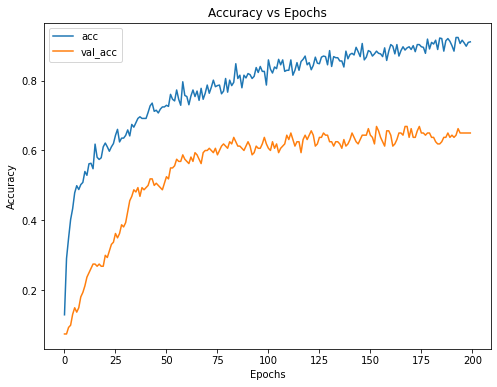

In [153]:
plot_acc(model.history)

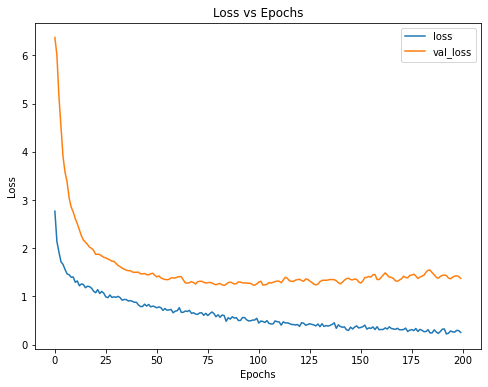

In [154]:
plot_loss(model.history)

### Adding images

In [7]:
image_dataset_path = "../Data/images_original/"

In [8]:
metadata = pd.read_csv('../Data/features_30_sec.csv')
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [34]:
X = []
y = []
for index_num, row in tqdm(metadata.iterrows()):
    try:
        img_name = ''.join(row['filename'].split('.')[0:-1])+'.png'
        file_name = os.path.join(os.path.abspath(image_dataset_path), str(row["label"])+"/", img_name)
        final_class_label = row["label"]
        img = Image.open(file_name).convert('RGB')
        img = img.resize((120, 75))
        data = np.asarray(img)
        data = data.reshape(120, 75, 3)
        X.append(data)
        y.append(final_class_label)
    except:
        pass

1000it [00:02, 384.02it/s]


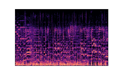

In [35]:
img = Image.open('../Data/images_original/disco/disco00005.png')
img = img.convert('RGB')
img = img.resize((120, 75))
img

In [36]:
X = np.array(X)
X.shape

(999, 120, 75, 3)

In [37]:
y = np.array(y)
y.shape

(999,)

In [38]:
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [40]:
X_train.shape

(799, 120, 75, 3)

In [41]:
X_train = X_train / 255
X_test = X_test / 255

In [42]:
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [195]:
inputA = Input(shape=(40,))
inputB = Input(shape=(13,))
inputC = Input(shape=(12,))
inputD = Input(shape=(1,))
inputE = Input(shape=(48, 32, 1, ))

x = Dense(128, activation="relu")(inputA)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
x = Model(inputs=inputA, outputs=x)

y = Dense(128, activation="relu")(inputB)
y = BatchNormalization()(y)
y = Dropout(0.5)(y)
y = Dense(256, activation="relu")(y)
y = BatchNormalization()(y)
y = Dropout(0.5)(y)
y = Dense(256, activation="relu")(y)
y = BatchNormalization()(y)
y = Dropout(0.4)(y)
y = Model(inputs=inputB, outputs=y)

z = Dense(128, activation="relu")(inputC)
z = BatchNormalization()(z)
z = Dropout(0.5)(z)
z = Dense(256, activation="relu")(z)
z = BatchNormalization()(z)
z = Dropout(0.5)(z)
z = Dense(256, activation="relu")(z)
z = BatchNormalization()(z)
z = Dropout(0.4)(z)
z = Model(inputs=inputC, outputs=z)

l = Dense(64, activation="relu")(inputD)
l = BatchNormalization()(l)
l = Dropout(0.5)(l)
l = Dense(128, activation="relu")(l)
l = BatchNormalization()(l)
l = Dropout(0.4)(l)
l = Model(inputs=inputD, outputs=l)

m = Conv2D(64, kernel_size=(5, 5) ,activation="relu", padding='same', input_shape=(48, 32, 1, ))(inputE)
m = Conv2D(64, kernel_size=(3, 3) ,activation="relu" )(m)
m = MaxPool2D((2, 2))(m)
m = Conv2D(64, kernel_size=(5, 5) ,activation="relu", padding='same')(m)
m = Conv2D(64, kernel_size=(3, 3) ,activation="relu" )(m)
m = MaxPool2D((2, 2))(m)
m = BatchNormalization()(m)
m = Dropout(0.5)(m)
m = Flatten()(m)

m = Dense(256, activation="relu")(m)
m = BatchNormalization()(m)
m = Dropout(0.4)(m)
m = Dense(128, activation="relu")(m)
m = Dense(64, activation="relu")(m)
m = BatchNormalization()(m)
m = Dropout(0.4)(m)

m = Model(inputs=inputE, outputs=m)

# combine the output of the two branches
combined = concatenate([x.output, y.output, z.output, l.output, m.output])

# combined outputs
n = Dense(256, activation="relu")(combined)
n = Dropout(0.5)(n)
n = BatchNormalization()(n)
n = Dense(128, activation="relu")(n)
n = BatchNormalization()(n)
n = Dense(128, activation="relu")(n)
n = Dense(128, activation="relu")(n)

n = Dense(10, activation="softmax")(n)

model = Model(inputs=[x.input, y.input, z.input, l.input, m.input], outputs=n)
model.summary()

Model: "model_87"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_75 (InputLayer)          [(None, 48, 32, 1)]  0           []                               
                                                                                                  
 conv2d_30 (Conv2D)             (None, 48, 32, 64)   1664        ['input_75[0][0]']               
                                                                                                  
 conv2d_31 (Conv2D)             (None, 46, 30, 64)   36928       ['conv2d_30[0][0]']              
                                                                                                  
 max_pooling2d_15 (MaxPooling2D  (None, 23, 15, 64)  0           ['conv2d_31[0][0]']              
 )                                                                                         

                                                                                                  
 dropout_213 (Dropout)          (None, 256)          0           ['batch_normalization_216[0][0]']
                                                                                                  
 dropout_216 (Dropout)          (None, 256)          0           ['batch_normalization_219[0][0]']
                                                                                                  
 dropout_218 (Dropout)          (None, 64)           0           ['batch_normalization_221[0][0]']
                                                                                                  
 dense_231 (Dense)              (None, 128)          32896       ['dropout_221[0][0]']            
                                                                                                  
 dense_221 (Dense)              (None, 256)          65792       ['batch_normalization_213[0][0]']
          

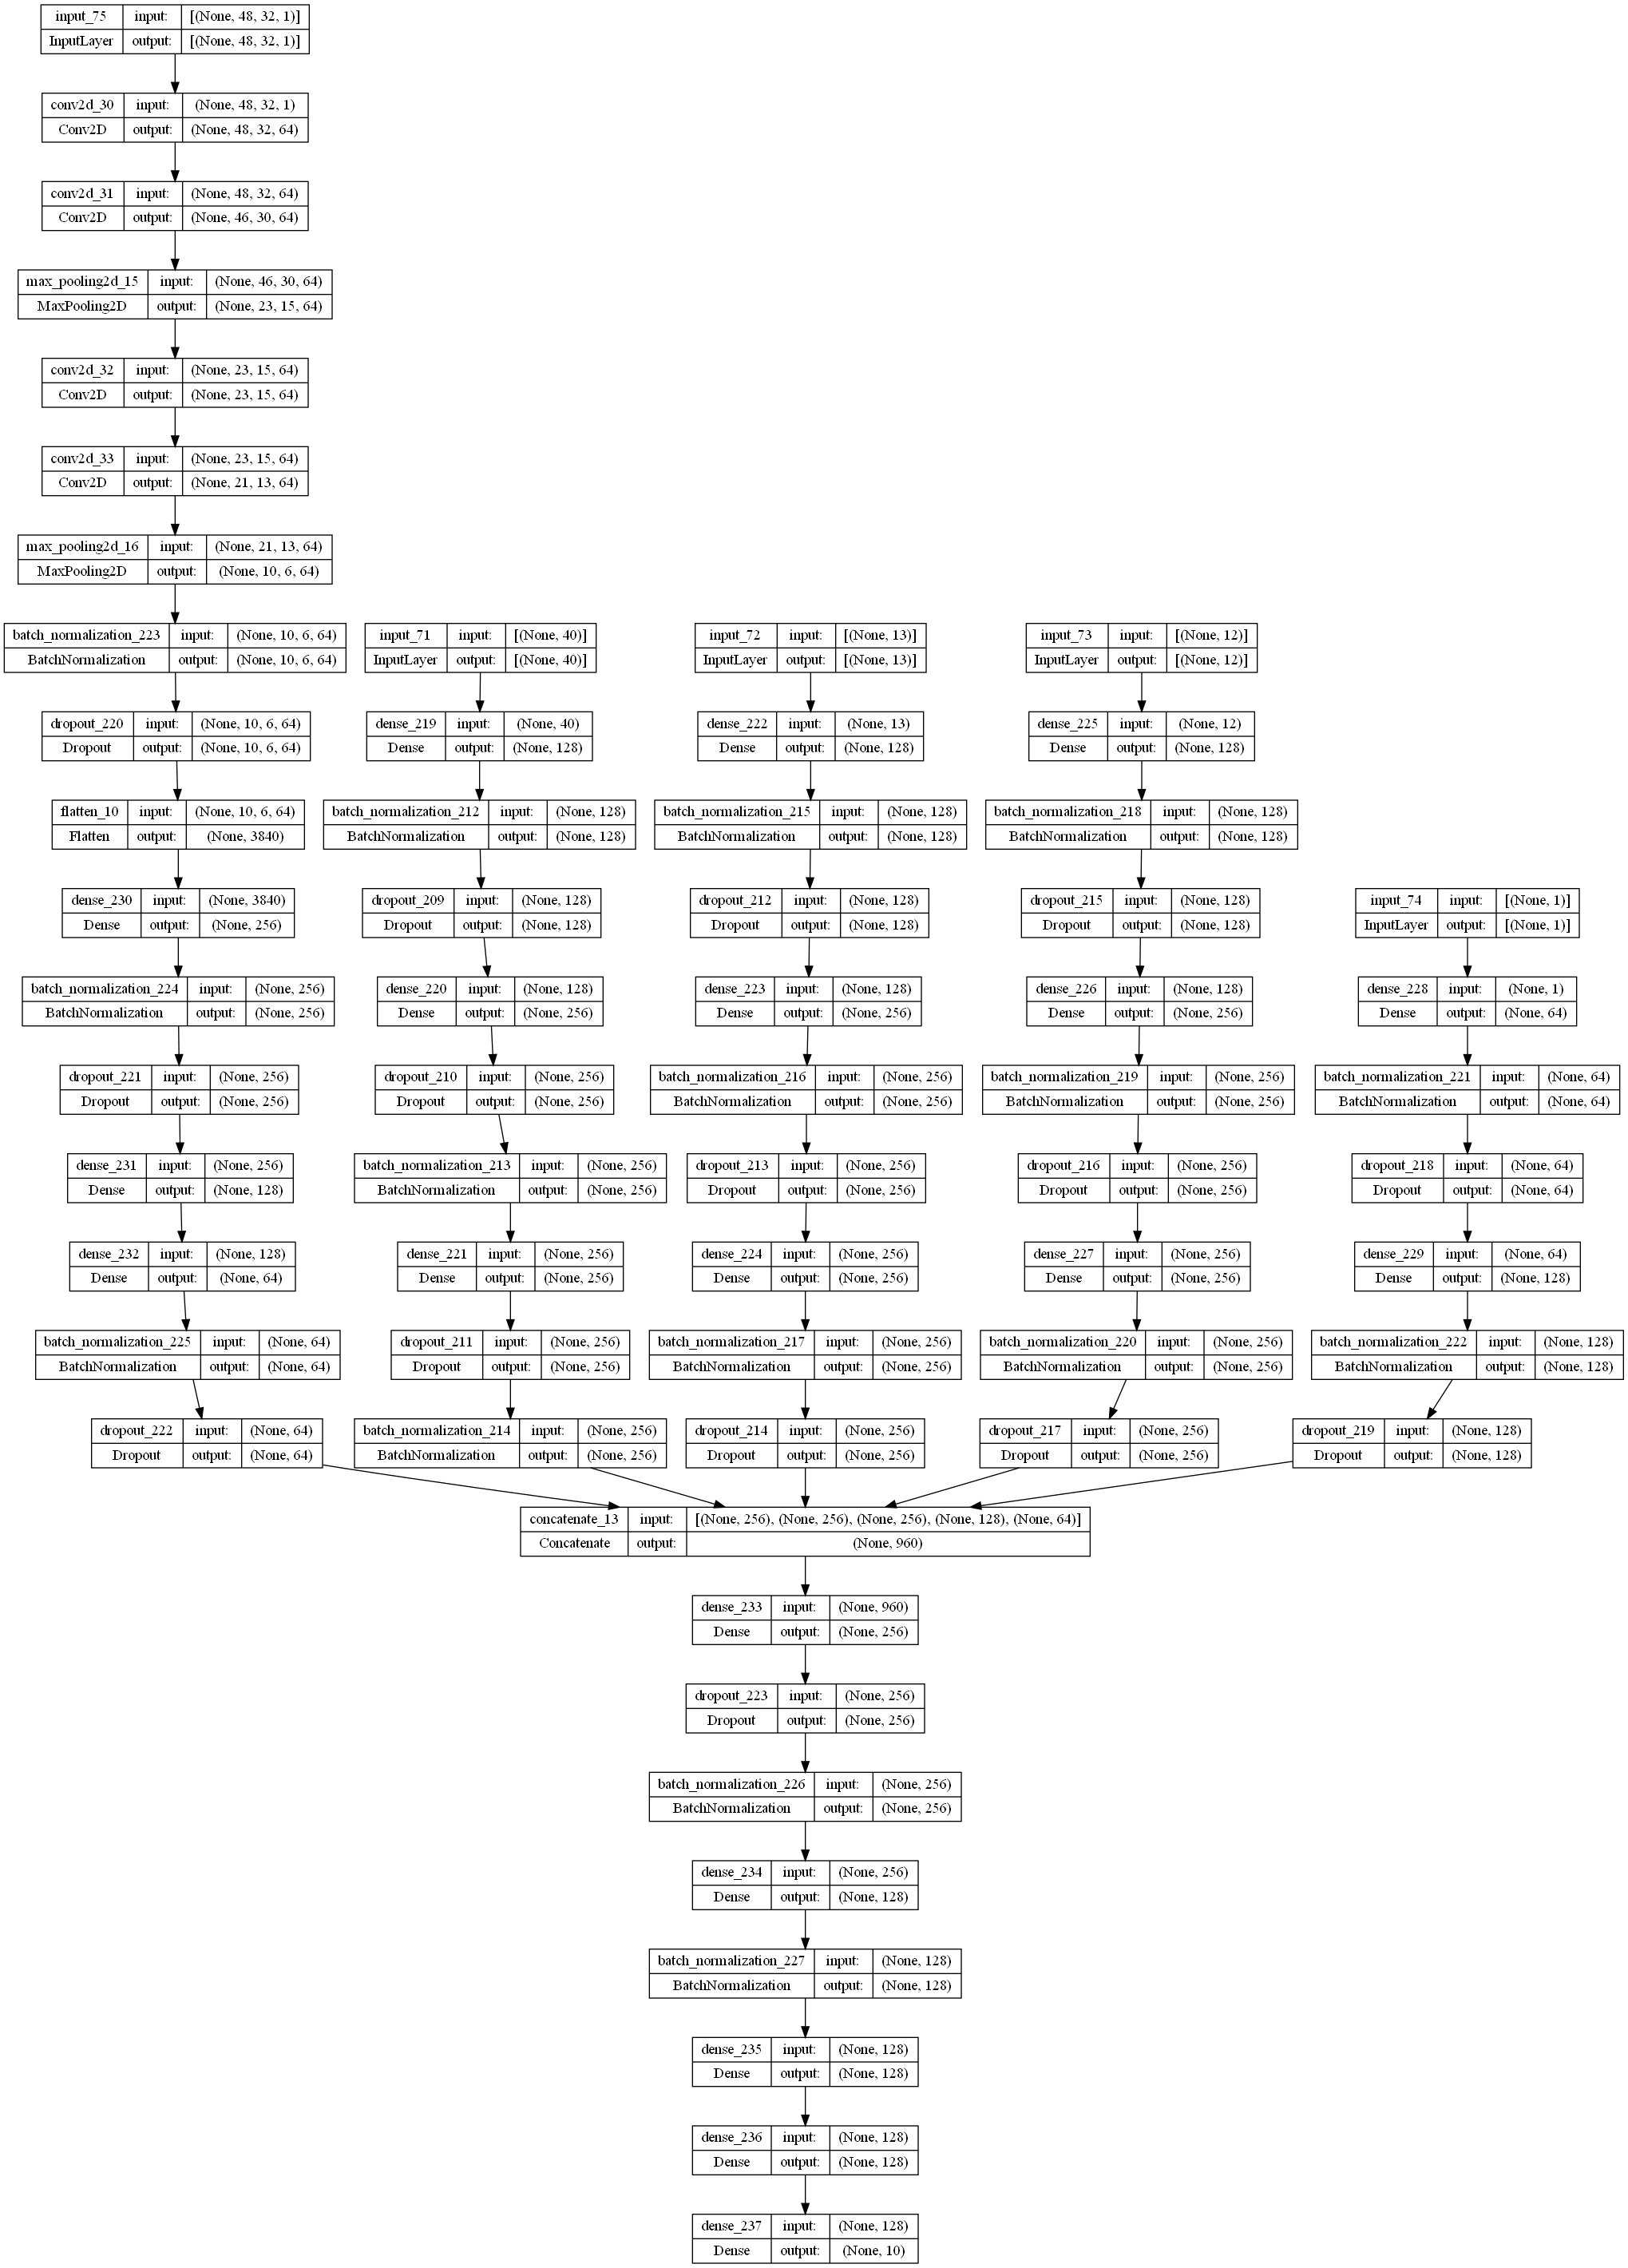

In [196]:
tf.keras.utils.plot_model(model, to_file="./combined_5_inputs_ver2.png", show_shapes=True)

In [197]:
opt = Adam(learning_rate=1e-3, decay=1e-3 / 200)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

In [198]:
model.fit(x=[X1_train, 
             X2_train,
             X3_train, 
             X4_train,
             X_train], y=y_train, validation_split=0.2, epochs=200, batch_size=64, callbacks=[reduce_lr])

Epoch 1/200
10/10 [==============================] - 4s 80ms/step - loss: 2.3532 - accuracy: 0.1252 - val_loss: 2.8099 - val_accuracy: 0.1312 - lr: 0.0010
Epoch 2/200
10/10 [==============================] - 0s 40ms/step - loss: 2.2026 - accuracy: 0.1941 - val_loss: 2.8292 - val_accuracy: 0.0812 - lr: 0.0010
Epoch 3/200
10/10 [==============================] - 0s 40ms/step - loss: 2.0390 - accuracy: 0.2770 - val_loss: 2.7989 - val_accuracy: 0.1125 - lr: 0.0010
Epoch 4/200
10/10 [==============================] - 0s 42ms/step - loss: 1.8417 - accuracy: 0.3459 - val_loss: 2.7242 - val_accuracy: 0.1187 - lr: 0.0010
Epoch 5/200
10/10 [==============================] - 0s 41ms/step - loss: 1.7712 - accuracy: 0.3427 - val_loss: 2.8215 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 6/200
10/10 [==============================] - 0s 39ms/step - loss: 1.6470 - accuracy: 0.4085 - val_loss: 2.8240 - val_accuracy: 0.1375 - lr: 0.0010
Epoch 7/200
10/10 [==============================] - 0s 41ms/step - lo

10/10 [==============================] - 0s 41ms/step - loss: 0.8512 - accuracy: 0.6964 - val_loss: 1.4574 - val_accuracy: 0.5063 - lr: 1.0000e-04
Epoch 54/200
10/10 [==============================] - 0s 44ms/step - loss: 0.8124 - accuracy: 0.7074 - val_loss: 1.4535 - val_accuracy: 0.5250 - lr: 1.0000e-04
Epoch 55/200
10/10 [==============================] - 0s 43ms/step - loss: 0.8257 - accuracy: 0.6948 - val_loss: 1.4509 - val_accuracy: 0.5188 - lr: 1.0000e-04
Epoch 56/200
10/10 [==============================] - 0s 44ms/step - loss: 0.8374 - accuracy: 0.6886 - val_loss: 1.4377 - val_accuracy: 0.5437 - lr: 1.0000e-04
Epoch 57/200
10/10 [==============================] - 0s 40ms/step - loss: 0.8426 - accuracy: 0.6839 - val_loss: 1.4308 - val_accuracy: 0.5500 - lr: 1.0000e-04
Epoch 58/200
10/10 [==============================] - 0s 41ms/step - loss: 0.8246 - accuracy: 0.6761 - val_loss: 1.4230 - val_accuracy: 0.5437 - lr: 1.0000e-04
Epoch 59/200
10/10 [==============================] -

Epoch 155/200
10/10 [==============================] - 0s 42ms/step - loss: 0.6724 - accuracy: 0.7543 - val_loss: 1.5516 - val_accuracy: 0.5500 - lr: 1.0000e-04
Epoch 156/200
10/10 [==============================] - 0s 46ms/step - loss: 0.7030 - accuracy: 0.7371 - val_loss: 1.6710 - val_accuracy: 0.4875 - lr: 1.0000e-04
Epoch 157/200
10/10 [==============================] - 0s 43ms/step - loss: 0.6835 - accuracy: 0.7402 - val_loss: 1.5212 - val_accuracy: 0.5500 - lr: 1.0000e-04
Epoch 158/200
10/10 [==============================] - 0s 44ms/step - loss: 0.7246 - accuracy: 0.7449 - val_loss: 1.3616 - val_accuracy: 0.5875 - lr: 1.0000e-04
Epoch 159/200
10/10 [==============================] - 0s 47ms/step - loss: 0.7387 - accuracy: 0.7277 - val_loss: 1.3164 - val_accuracy: 0.6187 - lr: 1.0000e-04
Epoch 160/200
10/10 [==============================] - 0s 42ms/step - loss: 0.6888 - accuracy: 0.7512 - val_loss: 1.3430 - val_accuracy: 0.5813 - lr: 1.0000e-04
Epoch 161/200
10/10 [=============

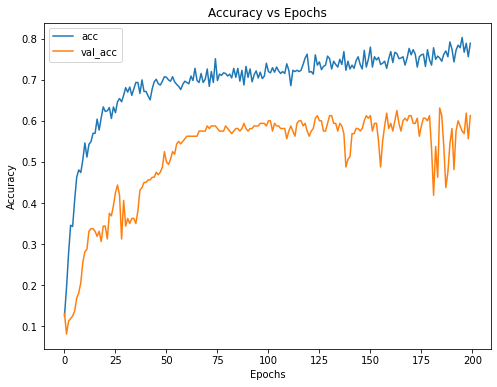

In [199]:
plot_acc(model.history)

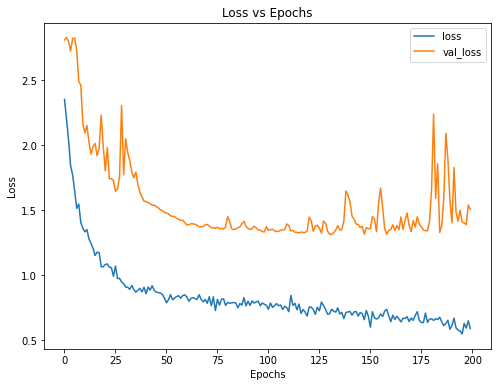

In [200]:
plot_loss(model.history)

### Transfer learning

In [28]:
from tensorflow.keras.applications import VGG16, InceptionV3

In [29]:
from tensorflow.keras import layers

In [68]:
def build_model():
    inputs = Input(shape=(120, 75, 3, ))
    model = InceptionV3(include_top=False, input_tensor=inputs, weights="imagenet")
    model.trainable = False
    
    x = layers.Conv2D(64, (5, 5), padding='same', activation='relu')(model.output)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    
    x = layers.Conv2D(64, (5, 5), padding='same', activation='relu')(x)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    
    x = layers.GlobalAveragePooling2D(name="avg_pool")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2, name="top_dropout")(x)
    
    x = Dense(512, activation="relu")(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Dense(512, activation="relu")(x)
    x = Dense(256, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    x = Dense(256, activation="relu")(x)
    x = Dense(128, activation="relu")(x)
    x = BatchNormalization()(x)
    
    x = Dense(256, activation="relu")(x)
    x = Dense(128, activation="relu")(x)
    x = BatchNormalization()(x)
    
    outputs = layers.Dense(10, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="TFModel")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model

In [69]:
model = build_model()
model.summary()

Model: "TFModel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 120, 75, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_983 (Conv2D)            (None, 59, 37, 32)   864         ['input_12[0][0]']               
                                                                                                  
 batch_normalization_981 (Batch  (None, 59, 37, 32)  96          ['conv2d_983[0][0]']             
 Normalization)                                                                                   
                                                                                            

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_991 (Batch  (None, 12, 7, 96)   288         ['conv2d_993[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_992 (Batch  (None, 12, 7, 32)   96          ['conv2d_994[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_971 (Activation)    (None, 12, 7, 64)    0           ['batch_normalization_986[0][0]']
                                                                                                  
 activatio

 activation_988 (Activation)    (None, 12, 7, 64)    0           ['batch_normalization_1003[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1003 (Conv2D)           (None, 12, 7, 48)    13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_1006 (Conv2D)           (None, 12, 7, 96)    55296       ['activation_988[0][0]']         
                                                                                                  
 batch_normalization_1001 (Batc  (None, 12, 7, 48)   144         ['conv2d_1003[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 hNormalization)                                                                                  
                                                                                                  
 activation_992 (Activation)    (None, 5, 3, 384)    0           ['batch_normalization_1007[0][0]'
                                                                 ]                                
                                                                                                  
 activation_995 (Activation)    (None, 5, 3, 96)     0           ['batch_normalization_1010[0][0]'
                                                                 ]                                
                                                                                                  
 max_pooling2d_44 (MaxPooling2D  (None, 5, 3, 288)   0           ['mixed2[0][0]']                 
 )                                                                                                
          

 batch_normalization_1020 (Batc  (None, 5, 3, 192)   576         ['conv2d_1022[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_996 (Activation)    (None, 5, 3, 192)    0           ['batch_normalization_1011[0][0]'
                                                                 ]                                
                                                                                                  
 activation_999 (Activation)    (None, 5, 3, 192)    0           ['batch_normalization_1014[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1004 (Activation)   (None, 5, 3, 192)    0           ['batch_normalization_1019[0][0]'
          

 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1029 (Batc  (None, 5, 3, 192)   576         ['conv2d_1031[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1030 (Batc  (None, 5, 3, 192)   576         ['conv2d_1032[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1006 (Activation)   (None, 5, 3, 192)    0           ['batch_normalization_1021[0][0]'
                                                                 ]                                
          

                                                                                                  
 batch_normalization_1031 (Batc  (None, 5, 3, 192)   576         ['conv2d_1033[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1034 (Batc  (None, 5, 3, 192)   576         ['conv2d_1036[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1039 (Batc  (None, 5, 3, 192)   576         ['conv2d_1041[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 conv2d_1046 (Conv2D)           (None, 5, 3, 192)    258048      ['activation_1028[0][0]']        
                                                                                                  
 conv2d_1051 (Conv2D)           (None, 5, 3, 192)    258048      ['activation_1033[0][0]']        
                                                                                                  
 conv2d_1052 (Conv2D)           (None, 5, 3, 192)    147456      ['average_pooling2d_99[0][0]']   
                                                                                                  
 batch_normalization_1041 (Batc  (None, 5, 3, 192)   576         ['conv2d_1043[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1044 (Batc  (None, 5, 3, 192)   576         ['conv2d_1046[0][0]']            
 hNormaliz

 max_pooling2d_45 (MaxPooling2D  (None, 2, 1, 768)   0           ['mixed7[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed8 (Concatenate)           (None, 2, 1, 1280)   0           ['activation_1037[0][0]',        
                                                                  'activation_1041[0][0]',        
                                                                  'max_pooling2d_45[0][0]']       
                                                                                                  
 conv2d_1063 (Conv2D)           (None, 2, 1, 448)    573440      ['mixed8[0][0]']                 
                                                                                                  
 batch_normalization_1061 (Batc  (None, 2, 1, 448)   1344        ['conv2d_1063[0][0]']            
 hNormaliz

                                                                  'activation_1049[0][0]']        
                                                                                                  
 activation_1050 (Activation)   (None, 2, 1, 192)    0           ['batch_normalization_1065[0][0]'
                                                                 ]                                
                                                                                                  
 mixed9 (Concatenate)           (None, 2, 1, 2048)   0           ['activation_1042[0][0]',        
                                                                  'mixed9_0[0][0]',               
                                                                  'concatenate_20[0][0]',         
                                                                  'activation_1050[0][0]']        
                                                                                                  
 conv2d_10

                                                                  'activation_1054[0][0]']        
                                                                                                  
 concatenate_21 (Concatenate)   (None, 2, 1, 768)    0           ['activation_1057[0][0]',        
                                                                  'activation_1058[0][0]']        
                                                                                                  
 activation_1059 (Activation)   (None, 2, 1, 192)    0           ['batch_normalization_1074[0][0]'
                                                                 ]                                
                                                                                                  
 mixed10 (Concatenate)          (None, 2, 1, 2048)   0           ['activation_1051[0][0]',        
                                                                  'mixed9_1[0][0]',               
          

In [70]:
epochs = 50
hist = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, verbose=2)

Epoch 1/50
20/20 - 6s - loss: 2.7617 - accuracy: 0.1127 - val_loss: 1445.1132 - val_accuracy: 0.1000 - 6s/epoch - 304ms/step
Epoch 2/50
20/20 - 1s - loss: 2.3803 - accuracy: 0.1080 - val_loss: 314.6983 - val_accuracy: 0.0750 - 932ms/epoch - 47ms/step
Epoch 3/50
20/20 - 1s - loss: 2.3286 - accuracy: 0.1268 - val_loss: 84.8513 - val_accuracy: 0.1375 - 927ms/epoch - 46ms/step
Epoch 4/50
20/20 - 1s - loss: 2.3210 - accuracy: 0.1424 - val_loss: 52.7281 - val_accuracy: 0.0437 - 943ms/epoch - 47ms/step
Epoch 5/50
20/20 - 1s - loss: 2.1714 - accuracy: 0.1659 - val_loss: 3.1219 - val_accuracy: 0.1875 - 938ms/epoch - 47ms/step
Epoch 6/50
20/20 - 1s - loss: 2.0895 - accuracy: 0.1941 - val_loss: 4.8284 - val_accuracy: 0.1500 - 962ms/epoch - 48ms/step
Epoch 7/50
20/20 - 1s - loss: 2.0283 - accuracy: 0.2222 - val_loss: 22.1196 - val_accuracy: 0.0938 - 931ms/epoch - 47ms/step
Epoch 8/50
20/20 - 1s - loss: 2.0768 - accuracy: 0.2316 - val_loss: 4.0137 - val_accuracy: 0.1562 - 930ms/epoch - 47ms/step
Ep

KeyboardInterrupt: 

In [ ]:
plot_loss(hist)